In [1]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np
import pandas as pd
import jieba_fast as jieba 
from collections import Counter
import visualize_words
import re
import csv
#import pymysql

D:\Program Files (x86)\Anaconda\envs\Machine_Learning\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [37]:
class DTMcorpus(corpora.textcorpus.TextCorpus):
    def get_texts(self):
        return self.input
    def __len__(self):
        return len(self.input)

In [131]:
data = pd.read_csv('人民日报4月新闻分类\\政治\\rmrb_zhengzhi.csv',encoding='utf8')
data.head()

,date,page,tag,title,url,content
0,2021年04月01日,11,政治,脱贫攻坚：中国人权事业发展的伟大实践,http://paper.people.com.cn/rmrb/html/2021-04/0...,2021年2月25日，习近平总书记庄严宣告：我国脱贫攻坚战取得了全面胜利，现行标准下9899...
1,2021年04月01日,11,政治,群众来电 我们来办（基层治理新实践）,http://paper.people.com.cn/rmrb/html/2021-04/0...,核心阅读 政务服务便民热线，搭起政府与市民的沟通桥梁。为解决群众办事多头找等问题，海南省海...
2,2021年04月01日,11,政治,向前,http://paper.people.com.cn/rmrb/html/2021-04/0...,喜马拉雅山脉腹地白雪皑皑，部分地段风吹雪厚度达到1米左右。3月30日，驻守在海拔4000多米...
3,2021年04月01日,11,政治,回应关切 亮出承诺,http://paper.people.com.cn/rmrb/html/2021-04/0...,本报太原3月31日电 （乔栋、杨红义、吴瑞彦）“为慢性病患者开辟了绿色通道”“慢性病手册随...
4,2021年04月01日,11,政治,严厉查处违规用火行为,http://paper.people.com.cn/rmrb/html/2021-04/0...,本报北京3月31日电 （记者丁怡婷）为有效管控野外火源，严厉查处违规用火行为，减少人为因素...


db = pymysql.connect(host = 'localhost', user = 'root', password = 'EGG2152', db = 'cucnews')
cursor = db.cursor()

sql = "SELECT date,page,tag,title,content FROM rmrb_copy2 where tag='要闻'"
cursor.execute(sql)
result = cursor.fetchall()
print(len(result))

In [132]:
Counter(data['date'].tolist()).keys(), Counter(data['date'].tolist()).values()

(dict_keys(['2021年04月01日', '2021年04月02日', '2021年04月07日', '2021年04月12日', '2021年04月13日', '2021年04月14日', '2021年04月20日', '2021年04月22日', '2021年04月23日', '2021年04月26日', '2021年04月27日', '2021年04月28日']),
 dict_values([6, 8, 6, 6, 5, 4, 4, 6, 7, 3, 7, 7]))

In [133]:
text_data = data['content']
#print(text_data)
stop_words = [i.strip() for i in open('stopwords1.0.txt', encoding = 'utf-8').readlines()]
text_processed = [jieba.lcut(str(i)) for i in text_data.to_list()]
text_processed = [[i.strip() for i in text if i not in stop_words] for text in text_processed]
text_processed = [[i.strip() for i in text if len(i) > 1] for text in text_processed]

print(len(text_data))

len(text_processed)

In [134]:
documents = text_processed

In [135]:
time_seq = list(Counter(data['date'].tolist()).values())
time_seq

[6, 8, 6, 6, 5, 4, 4, 6, 7, 3, 7, 7]

In [136]:
corpus = DTMcorpus(documents)
dtm_path = r'D:\Program Files (x86)\Jupyter_Notebook\Machine_Learning\NLP\dtm-win64.exe'
model = DtmModel(dtm_path,
                corpus,
                time_seq,
                num_topics = 5,
                id2word = corpus.dictionary,
                alpha = 0.01,
                initialize_lda = True)

topic1 = model.show_topic(topicid = 0, time = 1, topn = 10)
topic1

model.show_topics()

D:\Program Files (x86)\Anaconda\envs\Machine_Learning\lib\site-packages\gensim\models\wrappers\dtmmodel.py:494: UserWarning: The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.
  warnings.warn("The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.")


Number of records for Topic 0 = 60
Number of records for Topic 1 = 60
Number of records for Topic 2 = 60
Number of records for Topic 3 = 60
Number of records for Topic 4 = 60


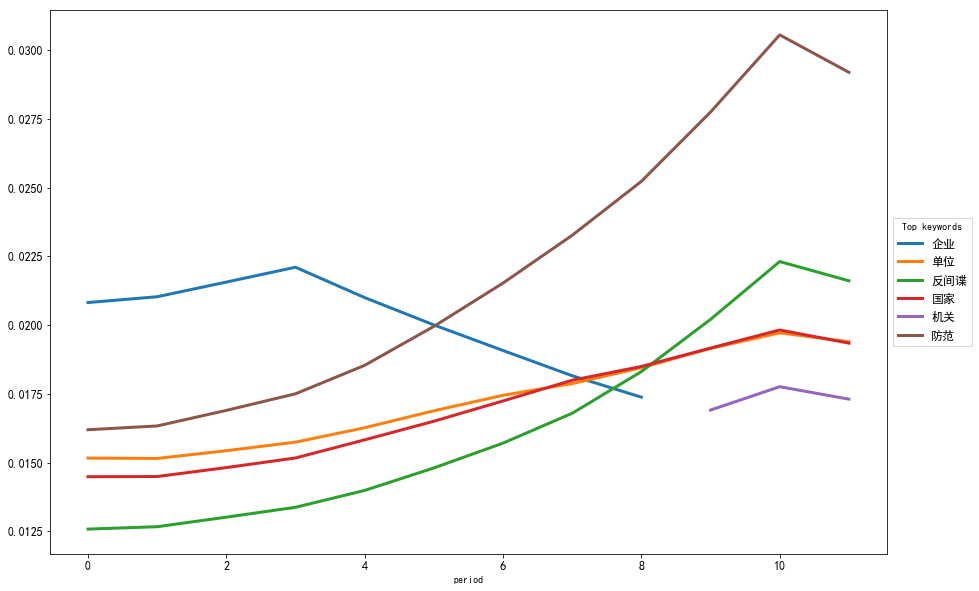


Results for the topic:  0


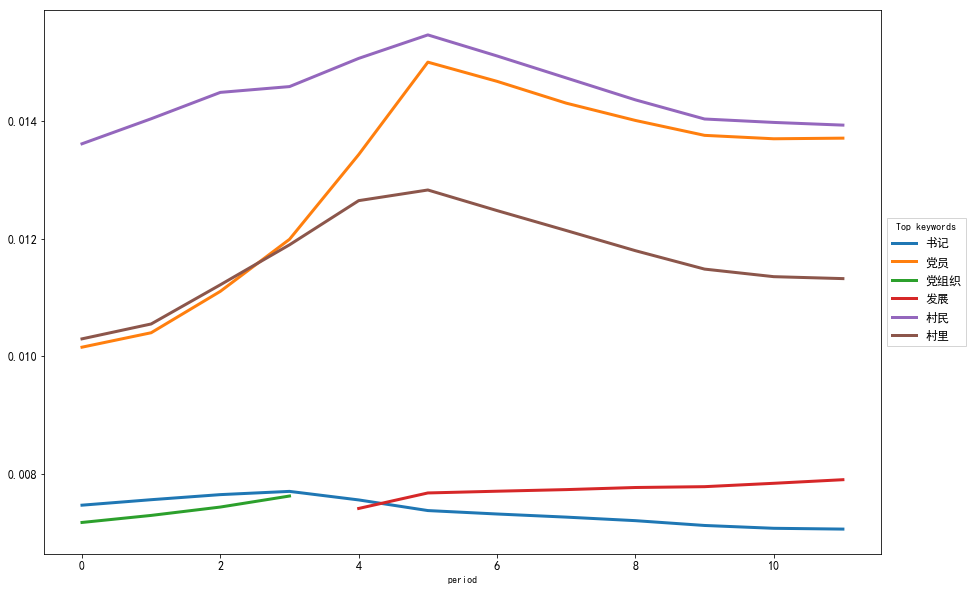


Results for the topic:  1


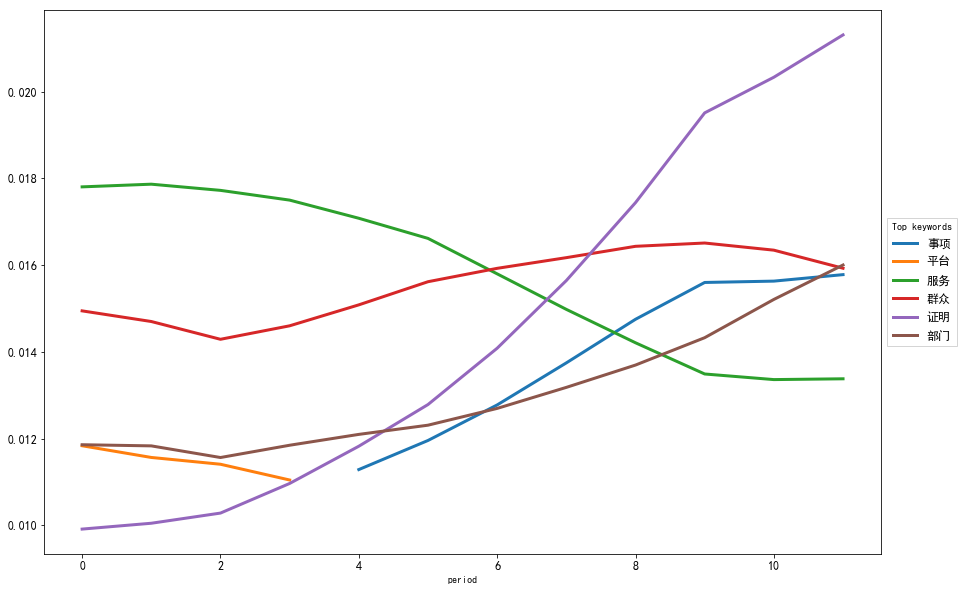


Results for the topic:  2


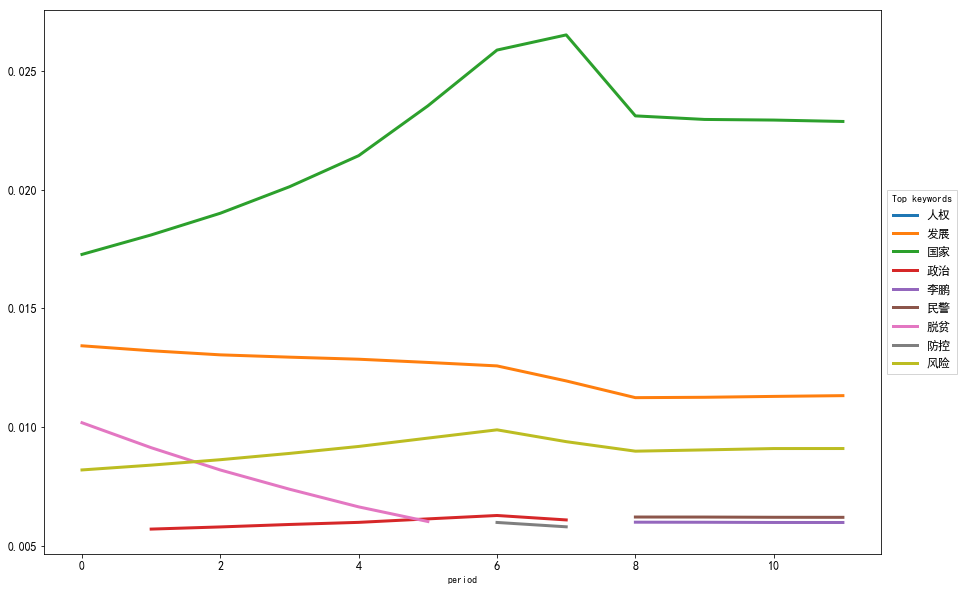


Results for the topic:  3


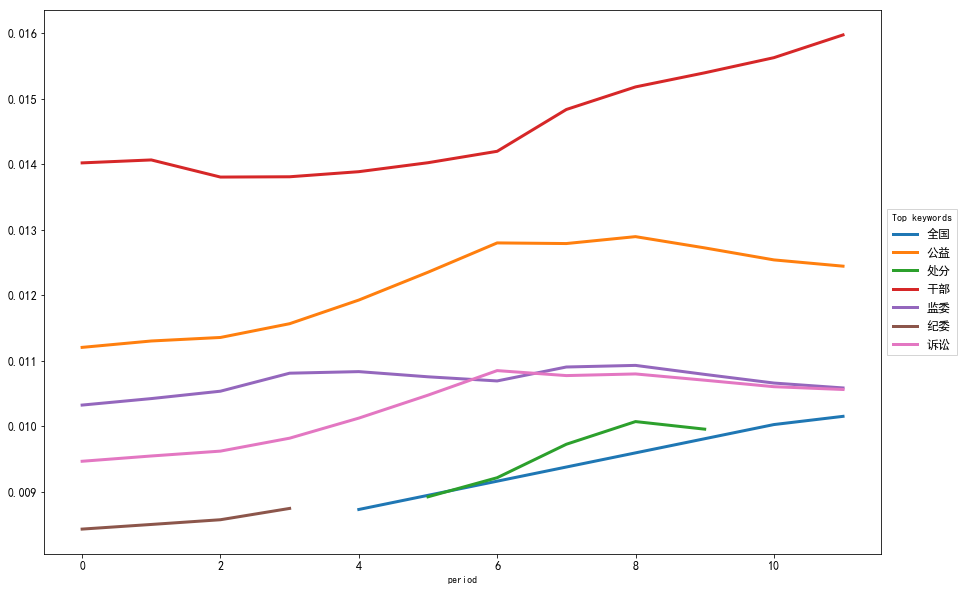


Results for the topic:  4


In [137]:
df = visualize_words.DF(timespans = len(time_seq), num_topics = 5, model = model, num_words = 5)
d = visualize_words.partitioning(df)
visualize_words.visualize_words(df, d)

In [138]:
df.to_csv('人民日报4月新闻分类\\政治\\topic_revolution_zhengzhi.csv', index = False)

doc_num = len(time_seq)
num_topics = 5
all_values = []
for i in range(0, doc_num):
    values = []
    for j in range(0, num_topics):
        #print('Distribution of Topic %d %f'% (j, model.gamma_[i, j]) )
        value = model.gamma_[i, j]
        #print(value)
        values.append(value)
    #values.sort(reverse = True)
    #values = values[0:6]
    #print(values)
    all_values.append(values)
    values = []
#print(all_values)
all_values = np.array(all_values)
#print(all_values)
'''pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.DataFrame(all_values)
print(df)'''
plt.figure(figsize=(10, 10))
for i in range(0, num_topics):
    plt.plot(all_values[:,i],color = 'C'+str(i), label = 'topic'+str(i), marker = '.')
plt.legend()
#plt.savefig("人民日报4月新闻分类\\法治\\topic_revolution.jpg",dpi=500,bbox_inches = 'tight')
plt.show()